<a href="https://colab.research.google.com/github/1941012176/DDoS-Attack-detection/blob/main/Dataset_and_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import pickle
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline


In [2]:
saved_dict = {}

In [3]:
dfs = []
for i in range(1,5):
  path ='./UNSW-NB15_{}.csv'
  dfs.append(pd.read_csv(path.format(i), header = None))
all_data = pd.concat(dfs).reset_index(drop=True)

In [4]:
df_col = pd.read_csv('./NUSW-NB15_features.csv', encoding= 'ISO-8859-1')

In [5]:
df_col['Name'] = df_col['Name'].apply(lambda x:x.strip().replace(' ','').lower())

In [6]:
all_data.columns = df_col['Name']

In [7]:
saved_dict['columns']=df_col['Name'][df_col['Name']!='label'].tolist()

In [8]:
del df_col

In [9]:
all_data.shape

(2540047, 49)

In [10]:
all_data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


## **Data Cleaning and Preprocessing:**

In [12]:
train, test = train_test_split(all_data,test_size=0.3, random_state=16)

In [13]:
del all_data

In [14]:
print(train.shape,'\n,', test.shape)

(1778032, 49) 
, (762015, 49)


In [15]:
train.isnull().sum()

,0
Name,
srcip,0
sport,0
dstip,0
dsport,0
proto,0
state,0
dur,0
sbytes,0
dbytes,0


In [17]:
train['attack_cat']=train.attack_cat.fillna(value='normal').apply(lambda x: x.strip().lower())

In [18]:
train['attack_cat'].value_counts()

,count
attack_cat,
normal,1552862
generic,150906
exploits,31507
fuzzers,16914
dos,11433
reconnaissance,9764
analysis,1855
backdoor,1242
shellcode,1055


In [19]:
train['ct_flw_http_mthd']=train.ct_flw_http_mthd.fillna(value=0)
train['is_ftp_login'].value_counts()

,count
is_ftp_login,
0.0,746536
1.0,30329
4.0,109
2.0,21


In [20]:
train['is_ftp_login']=(train.is_ftp_login.fillna(value=0)).astype(int)

In [21]:
train.isnull().sum().sum()

0

In [22]:
train.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object', name='Name')

### **Class Distribution:**

In [23]:
train_0, train_1 = train['label'].value_counts()[0]/len(train.index), train['label'].value_counts()[1]/len(train.index)
test_0, test_1 = test['label'].value_counts()[0]/len(test.index), test['label'].value_counts()[1]/len(test.index)

In [24]:
print("In Train: there are {} % of class 0 and {} % of class 1".format(train_0,train_1))
print("In Test: there are {} % of class 0 and {} % of class 1".format(test_0,test_1))

In Train: there are 0.8733599845222133 % of class 0 and 0.12664001547778667 % of class 1
In Test: there are 0.8738699369434985 % of class 0 and 0.1261300630565015 % of class 1


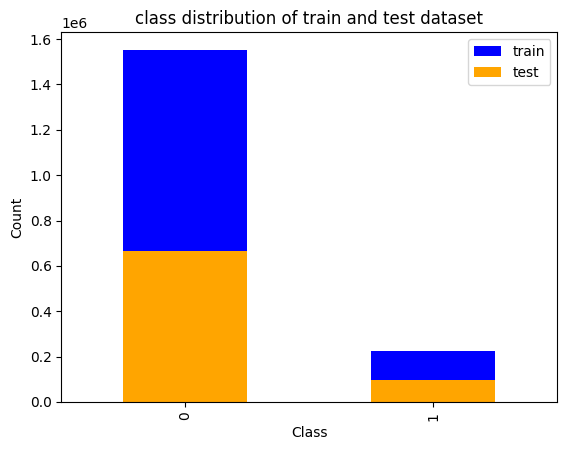

In [25]:
plt.figure()
plt.title("class distribution of train and test dataset")
train['label'].value_counts().plot(kind="bar", color='b',label="train")
test['label'].value_counts().plot(kind="bar", color='orange',label="test")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()

In [26]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 1499013)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778032 entries, 81030 to 2079982
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit           

In [29]:
train.dtypes.value_counts()

,count
int64,29
float64,11
object,9


In [30]:
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [31]:
train['ct_ftp_cmd'].unique()

array([0, ' ', 1, '1', '0', 5, 2, 3, 4, '4', 6, '2', 8], dtype=object)

In [33]:
train.select_dtypes(exclude=np.number).columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service',
       'ct_ftp_cmd', 'attack_cat'],
      dtype='object', name='Name')

In [34]:
train.select_dtypes(include=np.number).columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object', name='Name')

In [35]:
saved_dict['binary_col']=['is_sm_ips_ports' , 'is_ftp_login']

In [36]:
for col in 'is_sm_ips_ports', 'is_ftp_login':
  print(train[col].value_counts())
  print()

is_sm_ips_ports
0    1775116
1       2916
Name: count, dtype: int64

is_ftp_login
0    1747573
1      30329
4        109
2         21
Name: count, dtype: int64



In [39]:
train['is_ftp_login']=np.where(train['is_ftp_login']>1, 1, train['is_ftp_login'])


In [40]:
train['is_ftp_login'].value_counts()

,count
is_ftp_login,
0,1747573
1,30459


In [41]:
train['service']=train['service'].apply(lambda x:"None" if x=="-" else x)
train['service'].value_counts()

,count
service,
None,872286
dns,547094
http,144555
ftp-data,88310
smtp,57160
ftp,34293
ssh,32897
pop3,1076
dhcp,124


In [42]:
train['attack_cat'].nunique()

11

In [43]:
train['attack_cat'].value_counts()

,count
attack_cat,
normal,1552862
generic,150906
exploits,31507
fuzzers,16914
dos,11433
reconnaissance,9764
analysis,1855
backdoor,1242
shellcode,1055


In [44]:
train['attack_cat'] = train['attack_cat'].replace('backdoors','backdoor',regex=True).apply(lambda x: x.strip().lower())

In [45]:
train.shape, test.shape

((1778032, 49), (762015, 49))

In [47]:
train.to_csv('./train_alldata_EDA.csv', index=False)
test.to_csv('./train_alldata_EDA.csv', index=False)

In [48]:
pickle.dump(saved_dict, open('./final_ipynb', 'wb'))